# Raster Data for Earth Data Science

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rioxarray as rxr

# Earthpy is an earthlab package to work with spatial data
import earthpy as et
import earthpy.plot as ep


In [7]:
# Get data and set the working direcctory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

Extracted output to C:\Users\PC\earth-analytics\data\colorado-flood\.


In [9]:
# Create a path to file
# pre_DTM.tif is the data which is lidar derived elevation data and in .tif format
lidar_dtm_path = os.path.join("colorado-flood",
                             "spatial",
                             "boulder-leehill-rd",
                             "pre-flood",
                             "lidar",
                             "pre_DTM.tif")
lidar_dtm_path

'colorado-flood\\spatial\\boulder-leehill-rd\\pre-flood\\lidar\\pre_DTM.tif'

In [11]:
# reading the data inthe digital terrain model using rioxarray
# and using masked=True statement to mask all nodata values in the array.
lidar_dtm = rxr.open_rasterio(lidar_dtm_path, masked=True)

#viewing the data
lidar_dtm

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

## Exploring Raster Data Values & Structure

In [13]:
type(lidar_dtm)

xarray.core.dataarray.DataArray

calling `type()` on the Rioxarray variable's name returns an xarray DataArray. This contains metadata about the array as well as the data for the array stored in a numpy array.
To view the numpy array stored inside an xarray DataArray, add `.values` to the end of your Rioxarray variable name. 

In [15]:
lidar_dtm.dtype

dtype('float32')

In [16]:
# View the min and max values of the array
print(lidar_dtm.min(), lidar_dtm.max())

<xarray.DataArray ()>
array(1676.20996094)
Coordinates:
    spatial_ref  int32 0 <xarray.DataArray ()>
array(2087.42993164)
Coordinates:
    spatial_ref  int32 0


In [17]:
# viewing the dimensions of the array (rows, columns)
lidar_dtm.shape

(1, 2000, 4000)

## Visualizing the data

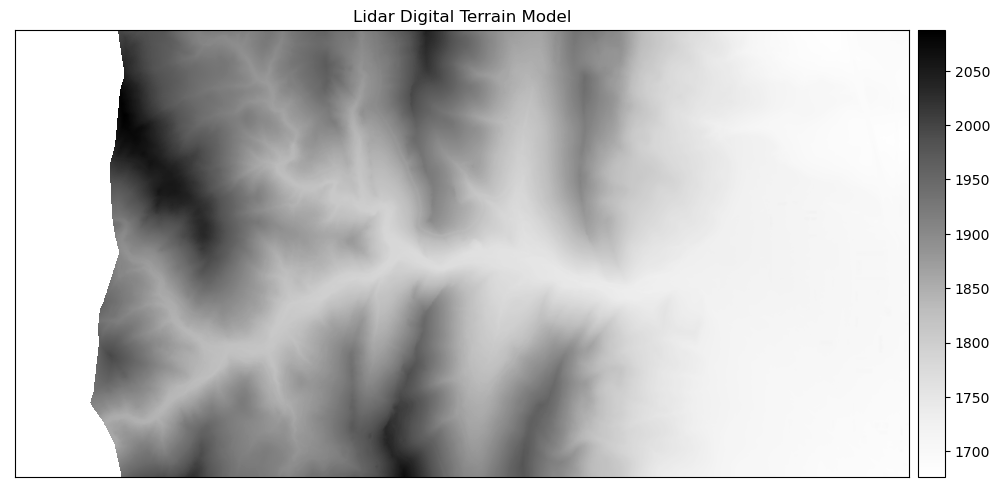

In [21]:
# for plotting we'll use 'earthpy.plot_bands'
ep.plot_bands(lidar_dtm,
             scale=False,
             cmap='Greys',
             title="Lidar Digital Terrain Model")
plt.show()